Files already downloaded and verified
Files already downloaded and verified


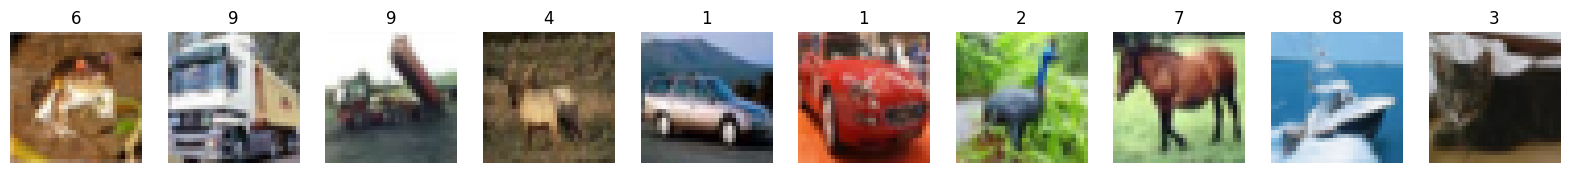

In [1]:
# Load dataset in Pytorch dataset class

from torchvision import models, datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

trainset = datasets.CIFAR10("content", train=True,  download=True)
testset = datasets.CIFAR10("content", train = False, download=True)

# Display some samples
for j in range(10):
  image, class_num = trainset[j]
  plt.subplot(1, 10 ,j+1)
  plt.imshow(image)
  plt.axis('off')
  plt.title(str(class_num))

In [2]:
# Validation function. Don't cahnge it
def validate(model,testloader):
  correct = 0
  total = 0
  with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

  return correct / total

# 1. Multi layer perceptron

Implement CIFAR10 classifier using a fully connected neural network.



In [6]:
import torch.nn as nn
import torch
import torch.nn.functional as F

class TwoLayerFCN(nn.Module):

    def __init__(self, class_nums = 10):
        super(TwoLayerFCN, self).__init__()
        # Define two or three layer fully - connected network with linear layers: https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear

        # Put your code here

        self.layer1 = nn.Linear(3072, 200)
        self.layer2 = nn.Linear(200, class_nums)
        self.activation = nn.ReLU()

    def forward(self, x):
        # Preprocess input, remember that first dimension of x is batch dimension !

        # Perform forward pass;
        # Use layers defined in constructor;
        # Add activation function on your choice: https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity

        # Put your code here

        output1 = self.layer1(x)
        activations = self.activation(output1)
        scores = self.layer2(activations)

        # return raw output of last layer
        return scores


In [4]:
# Prepare the data
transform=transforms.Compose([
                              transforms.ToTensor(), # Pil Image to Pytorch tensor
                              transforms.Normalize((0.491, 0.482, 0.446), (0.247, 0.243, 0.261)), # https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Normalize
                              # you can add some preprocessing here
                              transforms.Lambda(lambda x: x.flatten())
                              ])

trainset.transform = transform
testset.transform = transform

train_loader = DataLoader(trainset, batch_size = 512, shuffle = True)
test_loader = DataLoader(testset, batch_size = 256, shuffle = False)



### Train your model

In [7]:
import torch.optim as optim

# Train the model
# You may change loss function, learning rate and number of epochs

model = TwoLayerFCN(10)
model.train()

# By default cross-entropy loss used, you can change it to another loss function
criterion = nn.CrossEntropyLoss()

# You can change learning rate number of epochs, and select the optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(25):
  for i, (img_batch, labels_batch) in enumerate(train_loader):
    if i >= 2:
      break
    output = model(img_batch)
    loss = criterion(output, labels_batch)
    # Get the grad and update model weights: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#backprop

    # Put your code here
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  accuracy = validate(model,test_loader)
  print("Epoch {} Loss {:.2f} Accuracy {:.2f}".format(epoch,loss.item(),accuracy))


Epoch 0 Loss 2.30 Accuracy 0.26
Epoch 1 Loss 2.08 Accuracy 0.28
Epoch 2 Loss 1.95 Accuracy 0.33
Epoch 3 Loss 1.96 Accuracy 0.35
Epoch 4 Loss 1.85 Accuracy 0.34
Epoch 5 Loss 1.90 Accuracy 0.35
Epoch 6 Loss 1.91 Accuracy 0.36
Epoch 7 Loss 1.79 Accuracy 0.38
Epoch 8 Loss 1.85 Accuracy 0.38
Epoch 9 Loss 1.84 Accuracy 0.39
Epoch 10 Loss 1.75 Accuracy 0.39
Epoch 11 Loss 1.76 Accuracy 0.40
Epoch 12 Loss 1.76 Accuracy 0.40
Epoch 13 Loss 1.70 Accuracy 0.40
Epoch 14 Loss 1.78 Accuracy 0.41
Epoch 15 Loss 1.67 Accuracy 0.42
Epoch 16 Loss 1.58 Accuracy 0.41
Epoch 17 Loss 1.64 Accuracy 0.41
Epoch 18 Loss 1.68 Accuracy 0.41
Epoch 19 Loss 1.75 Accuracy 0.41
Epoch 20 Loss 1.67 Accuracy 0.43
Epoch 21 Loss 1.67 Accuracy 0.42
Epoch 22 Loss 1.65 Accuracy 0.42
Epoch 23 Loss 1.61 Accuracy 0.43
Epoch 24 Loss 1.59 Accuracy 0.44


# 2. Compare different optimizators

* Take three different optimizers e.g.: SGD, SGD with momentum, AdamW.
* Train the model with each of them.
* Plot the loss curve for different optimizers in same axis
*


*Because this task is time consuming it is recommended to perform calculations on a small piece of datastat*

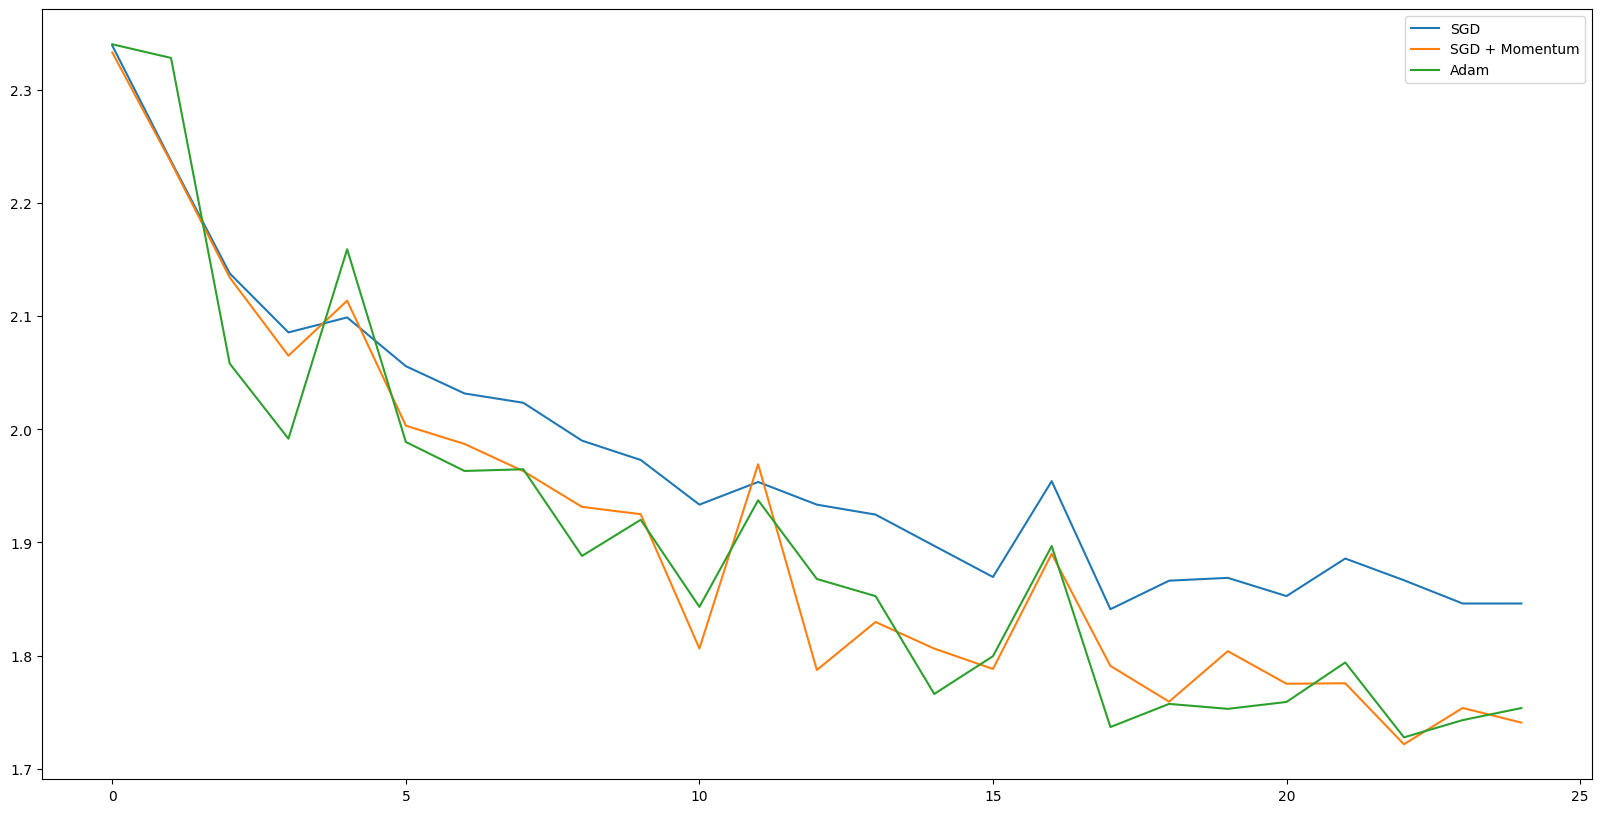

In [52]:
# Put your code here
import matplotlib.pyplot as plt

criterion = nn.CrossEntropyLoss()

model1 = TwoLayerFCN(10)
model1.train()
optimizer1 = optim.SGD(model1.parameters(), lr=7e-2)

model2 = TwoLayerFCN(10)
model2.train()
optimizer2 = optim.SGD(model2.parameters(), lr=5e-2, momentum=0.9)

model3 = TwoLayerFCN(10)
model3.train()
optimizer3 = optim.Adam(model3.parameters(), lr=1e-3)

losses = [[], [], []]
for epoch in range(25):
  for i, (images, labels) in enumerate(train_loader):
    if i >= 1:
      break
    
    output1 = model1(images)
    loss1 = criterion(output1, labels)
    loss1.backward()
    optimizer1.step()
    optimizer1.zero_grad()

    output2 = model2(images)
    loss2 = criterion(output2, labels)
    loss2.backward()
    optimizer2.step()
    optimizer2.zero_grad()

    output3 = model3(images)
    loss3 = criterion(output3, labels)
    loss3.backward()
    optimizer3.step()
    optimizer3.zero_grad()
    
  losses[0].append(loss1.item())
  losses[1].append(loss2.item())
  losses[2].append(loss3.item())
  
plt.plot(losses[0], label='SGD')
plt.plot(losses[1], label='SGD + Momentum')
plt.plot(losses[2], label='Adam')
plt.legend()
plt.show()


## Ideas for extra work

* Find optimal size of hidden layer
* Plot mean absolute gradients value per layer
* Compare different Activation functions
* Use instruments like [Tensorboard](https://pytorch.org/docs/stable/tensorboard.html) or [WandB](https://wandb.ai/site) to log results
* Use [Lightning](https://lightning.ai/) to implement train loop